<a href="https://colab.research.google.com/github/louisbrulenaudet/ragoon/blob/main/notebooks/RAGoon_SimilaritySearch_cookbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RAGoon SimilaritySearch cookbook ⚡
[![Python](https://img.shields.io/pypi/pyversions/tensorflow.svg)](https://badge.fury.io/py/tensorflow) [![License](https://img.shields.io/badge/License-Apache_2.0-blue.svg)](https://opensource.org/licenses/Apache-2.0) ![Maintainer](https://img.shields.io/badge/maintainer-@louisbrulenaudet-blue)
[![GitHub](https://img.shields.io/badge/GitHub-Project-blue?logo=github)](https://github.com/louisbrulenaudet/ragoon)

![Plot](https://github.com/louisbrulenaudet/ragoon/blob/main/thumbnail.png?raw=true)

RAGoon is a set of NLP utilities for multi-model embedding production, high-dimensional vector visualization, and aims to improve language model performance by providing contextually relevant information through search-based querying, web scraping and data augmentation techniques.

In this notebook, you will learn how to create and search document in a corpus using scalar (int8) rescoring.

## Quick install
The reference page for RAGoon is available on the official page of PyPI: [RAGoon](https://pypi.org/project/ragoon/).

```python
pip install ragoon
```

## Citing this project
If you use this code in your research, please use the following BibTeX entry.

```BibTeX
@misc{louisbrulenaudet2024,
	author = {Louis Brulé Naudet},
	title = {RAGoon : High level library for batched embeddings generation, blazingly-fast web-based RAG and quantized indexes processing},
	howpublished = {\url{https://github.com/louisbrulenaudet/ragoon}},
	year = {2024}
}
```

## Feedback
If you have any feedback, please reach out at [louisbrulenaudet@icloud.com](mailto:louisbrulenaudet@icloud.com).



# Installation

The RAGoon project leverages a variety of libraries to provide robust functionality for tasks such as embeddings generation, retrieval-augmented generation (RAG), and web-based processing. Below is an overview of some key dependencies:

- `transformers`: This library from Hugging Face is esential for working with state-of-the-art language models, enabling the project to perform tasks like text generation and model inference.
- `torch`: PyTorch is used for deep learning operations, particularly for model training and inference. It is a fundamental component for handling neural networks and tensor computations.
- `sentence_transformers`: This library simplifies the generation of dense vector representations (embeddings) from text, which is crucial for tasks like semantic search and information retrieval.
- `faiss_cpu`: FAISS is a powerful library for efficient similarity search, used in RAGoon to handle large-scale indexing and retrieval tasks with high performance.
- `httpx` and `beautifulsoup4`: These libraries are used for web scraping and making HTTP requests, enabling the project to fetch and process data from web sources efficiently.
- `openai`: This library connects to OpenAI's APIs, allowing integration with models like GPT for advanced text generation capabilities.
- `huggingface_hub`: Essential for interacting with Hugging Face’s model repository, enabling easy access to pre-trained models and datasets.

These dependencies work together to empower RAGoon with advanced capabilities in natural language processing, machine learning, and web data processing, making it a versatile tool for developers and researchers in AI.

In [ ]:
!pip3 install ragoon polars

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metad

In [19]:
import polars as pl

from ragoon import (
    dataset_loader,
    SimilaritySearch,
    EmbeddingsVisualizer
)

# Instance creation

The `SimilaritySearch` class is instantiated with specific parameters to configure the embedding model and search infrastructure. The chosen model, `louisbrulenaudet/tsdae-lemone-mbert-base`, is likely a multilingual BERT model fine-tuned with TSDAE (Transfomer-based Denoising Auto-Encoder) on a custom dataset. This model choice suggests a focus on multilingual capabilities and improved semantic representations.

The `cuda` device specification leverages GPU acceleration, crucial for efficient processing of large datasets. The embedding dimension of `768` is typical for BERT-based models, representing a balance between expressiveness and computational efficiency. The `ip` (inner product) metric is selected for similarity comparisons, which is computationally faster than cosine similarity when vectors are normalized. The `i8` dtype indicates 8-bit integer quantization, a technique that significantly reduces memory usage and speeds up similarity search at the cost of a small accuracy rade-off.

In [ ]:
instance = SimilaritySearch(
    model_name="louisbrulenaudet/tsdae-lemone-mbert-base",
    device="cuda",
    ndim=768,
    metric="ip",
    dtype="i8"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/6.11k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/828 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.56M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Dataset download and embeddings generation

The encode method transforms raw text into dense vector representations. This process involves tokenization, where text is split into subword units, followed by passing these tokens through the neural network layers of the SentenceTransformer model. The resulting embeddings capture semantic information in a high-dimensional space, where similar concepts are positioned closer together. The method likely uses batching to efficiently process large datasets and may employ techniques like length sorting to optimize padding and reduce computational waste.

In [18]:
dataset = dataset_loader(
    name="louisbrulenaudet/dac6-instruct",
    streaming=False,
    split="train"
)

dataset.save_to_disk("dataset.hf")
dataset

Saving the dataset (0/1 shards):   0%|          | 0/414 [00:00<?, ? examples/s]

Dataset({
    features: ['instruction', 'output', 'input'],
    num_rows: 414
})

In [14]:
embeddings = instance.encode(corpus=dataset["output"])
embeddings

Batches:   0%|          | 0/13 [00:00<?, ?it/s]

array([[ 0.02508392, -0.00361205, -0.02245241, ...,  0.03226953,
        -0.01613418, -0.04832081],
       [-0.02329118, -0.02008231,  0.01489964, ...,  0.02344927,
         0.04810405, -0.02210646],
       [ 0.00223175, -0.01829153, -0.02352205, ...,  0.01129541,
         0.00152115, -0.03072203],
       ...,
       [ 0.01643743, -0.02181389, -0.01811864, ...,  0.03853112,
         0.00745914, -0.02401087],
       [ 0.00709248,  0.009109  , -0.05994354, ...,  0.04204508,
        -0.00673348, -0.01090278],
       [-0.00633491, -0.01061832,  0.02608344, ...,  0.07235143,
         0.00243154, -0.01910995]], dtype=float32)

# Binary quantization

Binary quantization is an extreme form of dimensionality reduction, where each dimension of the embedding is represented by a single bit. This process involves setting a threshold (often the median value for each dimension across the dataset) and encoding values above this threshold as 1 and below as 0. While this dramatically reduces memory usage (compressing each embedding to just 96 bytes for a 768-dimensional vector), it also results in a more significant loss of information compared to other quantization methods. However, it enables extremely fast similarity computations using hardware-accelerated bitwise operations.

array([[152,  86,  70, ..., 173, 112,  84],
       [ 42, 215, 109, ...,  13,  60, 198],
       [136, 151, 117, ...,  77, 208,  22],
       ...,
       [136, 148,  85, ...,  46, 248, 198],
       [204, 222, 134, ..., 223, 216, 244],
       [ 44,  21,  70, ..., 189, 244, 246]], dtype=uint8)
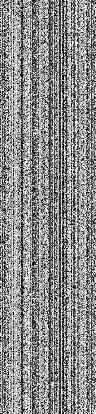

In [ ]:
ubinary_embeddings = instance.quantize_embeddings(
    embeddings=embeddings,
    quantization_type="ubinary"
)

ubinary_embeddings

# Quantizing embeddings to 8-bit integers

Int8 quantization maps the continuous embedding values to a discrete set of 256 values represented by 8-bit integers. This process typically involves scaling the original values to fit within the int8 range (-128 to 127) and may use techniques like asymmetric quantization to preserve more information. While less extreme than binary quantization, int8 still offers substantial memory savings (reducing each dimension to 1 byte) while preserving more of the original information. This quantization enables efficient SIMD (Single Instruction, Multiple Data) operations on modern CPUs, significantly accelerating similarity computations.

In [ ]:
int8_embeddings = instance.quantize_embeddings(
    embeddings=embeddings,
    quantization_type="int8"
)

int8_embeddings

array([[ 55,  -4, -13, ...,   5, -64, -11],
       [-53, -30,  71, ...,  -7,  43,  32],
       [  4, -27, -15, ..., -25, -34,  18],
       ...,
       [ 36, -33,  -3, ...,  15, -24,  29],
       [ 15,  16, -97, ...,  20, -48,  51],
       [-15, -15,  96, ...,  65, -33,  37]], dtype=int8)

# Creating a USEARCH index

USEARCH is designed for high-performance approximate nearest neighbor search. The index creation process likely involves building a hierarchical structure, possibly a navigable small world (NSW) graph, which allows for efficient traversal during search operations. The use of int8 quantized embeddings enables USEARCH to leverage SIMD instructions for rapid distance calculations. The resulting index balances search speed and accuracy, allowing for fast retrieval with a controlled trade-off in precision.

In [17]:
instance.create_usearch_index(
    int8_embeddings=int8_embeddings,
    index_path="./usearch_int8.index",
    save=True
)

usearch.Index
- config
-- data type: ScalarKind.I8
-- dimensions: 768
-- metric: MetricKind.IP
-- multi: False
-- connectivity: 16
-- expansion on addition :128 candidates
-- expansion on search: 64 candidates
- binary
-- uses OpenMP: 0
-- uses SimSIMD: 1
-- supports half-precision: 1
-- uses hardware acceleration: haswell
- state
-- size: 414 vectors
-- memory usage: 20,975,808 bytes
-- max level: 2
--- 0. 414 nodes
--- 1. 26 nodes
--- 2. 2 nodes

# Creating a FAISS index

FAISS (Facebook AI Similarity Search) is a library that provides efficient similarity search and clustering of dense vectors. For binary vectors, FAISS typically uses specialized index structures like the BinaryFlat index. This index performs exhaustive search using Hamming distance, which can be computed extremely efficiently on modern hardware using XOR and bit count operations. The binary nature of the index allows for compact storage and very fast search operations, albeit with reduced granularity in similarity scores compared to float-based indices.

In [16]:
instance.create_faiss_index(
    ubinary_embeddings=ubinary_embeddings,
    index_path="./faiss_ubinary.index",
    save=True
)

# Performing a similarity search

The search process combines the strengths of both USEARCH and FAISS indices. It likely first uses the binary FAISS index for a rapid initial filtering step, leveraging the efficiency of Hamming distance calculations. The top candidates from this step (increased by the rescore_multiplier for better recall) are then refined using the more precise int8 USEARCH index. This two-stage approach balances speed and accuracy, allowing for quick pruning of unlikely candidates followed by more accurate rescoring.

The query is first encoded using the same model and quantization processes as the corpus. The rescore_multiplier of 4 means the initial retrieval fetches 40 candidates (4 * top_k), which are then reranked to produce the final top 10 results. This oversampling helps mitigate the potential loss of relevant results due to quantization approximations.

In [ ]:
top_k_scores, top_k_indices = instance.search(
    query="Définir le rôle d'un intermédiaire concepteur conformément à l'article 1649 AE du Code général des Impôts.",
    top_k=10,
    rescore_multiplier=4
)
print(top_k_scores, top_k_indices)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[2647.0556676079723, 2148.418636998307, 2106.1046419678387, 1961.8936295222884, 1947.321377885688, 1864.701749966327, 1845.0419668774193, 1795.922021207407, 1774.0641026571975, 1706.500367158289] [342, 66, 359, 242, 369, 10, 33, 261, 181, 230]


In [ ]:
try:
    dataframe = pl.from_arrow(dataset.data.table).with_row_index()

except:
    dataframe = pl.from_arrow(dataset.data.table).with_row_count(
        name="index"
    )


scores_df = pl.DataFrame(
    {
        "index": top_k_indices,
        "score": top_k_scores
    }
).with_columns(
    pl.col("index").cast(pl.UInt32)
)

search_results = dataframe.filter(
    pl.col("index").is_in(top_k_indices)
).join(
    scores_df,
    how="inner",
    on="index"
)

search_results

# Embeddings visualization

In [20]:
visualizer = EmbeddingsVisualizer(
    index_path="./faiss_ubinary.index",
    dataset_path="./dataset.hf"
)

In [ ]:
visualizer.visualize(
    column="output"
    method="pca",
    save_html=True,
    html_file_name="embedding_visualization.html"
)